In [285]:
import scipy.fftpack as fft
import scaleogram as scg
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import scipy.signal as signal
from matplotlib.pyplot import figure

## Курсовая работа по курсу "Введение в методы обработки и анализа данных"

### Тема "Wavelet анализ"
#### Выполнил: студент группы М80-103М-19 Бобряков А.С.

## Теоретическая часть

### 1. Преобразование Фурье

Преобразование Фурье — операция, сопоставляющая одной функции вещественной переменной другую функцию вещественной переменной. Эта новая функция описывает коэффициенты («амплитуды») при разложении исходной функции на элементарные составляющие — гармонические колебания с разными частотами.

Преобразование Фурье функции f вещественной переменной является интегральным и задаётся следующей формулой:

<img src="project/1.jpg">

Но преобразование Фурье дает информацию только про частоту, которая присутствует в сигнале и не дает никакой информации про то, в какой промежуток времени эта частота присутствует в сигнале, например:

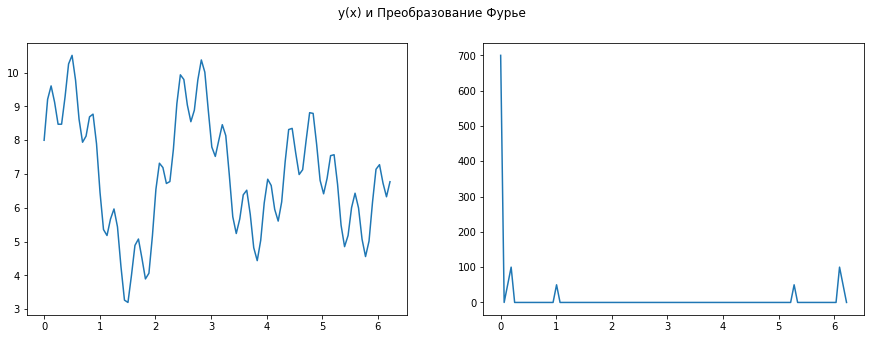

In [286]:
x = np.linspace(0, np.pi * 2, 100, endpoint=False)
y = 0. + 2.*np.sin(x * 3) + 7 + np.cos(x * 2 ) + np.sin(x * 16)
y_fft = fft.fft(y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('y(x) и Преобразование Фурье')
ax1.plot(x, y)
ax2.plot(x, np.abs(y_fft))

Таким образом, для двух абсолютно разных сигналов мы можем получить почти одинаковые преобразования Фурье.
Это наблюдается для стационарного и нестационарного сигнала: примеры преобразований фурье:
<img src="project/2.jpg">

Таким образом преобразование Фурье по своей сути не может отличить стационарный сигнал от нестационарного, что является большой проблемой для его применимости. Решение - Оконное преобразование Фурье.

### 2. Оконное преобразование Фурье

Оконное преобразование Фурье — это разновидность преобразования Фурье, определяемая следующим образом:
<img src="project/3.jpg">
где W(t-T) — некоторая оконная функция

Оконное преобразования Фурье, в отличии от обычного преобразования Фурье, уже является функцией от времени, частоты и амплитуды. То есть она позволяет получать характеристику распределения частоты сигнала (с амплитудой) во времени.

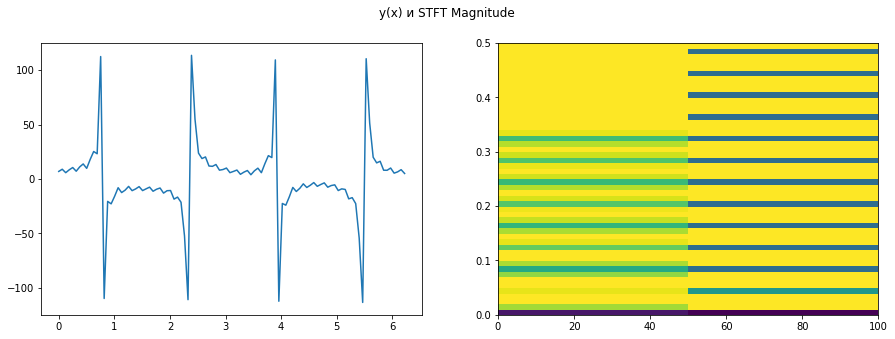

In [287]:
x = np.linspace(0, np.pi * 2, 100, endpoint=False)
y = 0. + 2.*np.sin(x * 3) + 7 / np.cos(x * 2 ) + np.tan(x * 16)

f, t, Zxx = signal.stft(y, nperseg=100)
amp = 2 * np.sqrt(2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('y(x) и STFT Magnitude')
ax1.plot(x, y)

ax2.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp)
# ylabel('Frequency [Hz]')
# xlabel('Time [sec]')
plt.show()

Но главной проблемой в использовании оконного преобразования Фурье для получения частотно-временной характеристики сигнала является так называемый принцип неопределенности Гейзенберга, который возникает для параметров времени и частоты сигнала.
В основе принципа неопределенности лежит тот факт, что невозможно сказать точно какая частота присутствует в сигнале в данный момент времени (можно говорить только про диапазон частот) и не возможно сказать в какой точно момент времени частота присутствует в сигнале (можно говорить лишь про период времени).
В связи с этим возникает проблема разрешающей способности. Разрешающую способность оконного преобразования Фурье можно регулировать с помощью ширины окна.

 Таким образом при увеличении ширины окна (уменьшении его разрешающей способности) мы увеличиваем точность относительно частоты и уменьшаем точность относительно времени.
Какое тогда подобрать значение ширины окна, чтобы добиться оптимального соотношения точностей? На этот вопрос отвечает вейвлет-преобразование

### Wavelet-преобразование

Вейвлет-преобразование (англ. Wavelet transform) — интегральное преобразование, которое представляет собой свертку вейвлет-функции с сигналом. Вейвлет-преобразование переводит сигнал из временного представления в частотно-временное.

<img src="project/4.jpg">

Материнский вейвлет — это функция, которая является прототипом для всех окон, которые будут генерироваться во время вейвлет-преобразования.  
Сдвиг по времени регулирует движение генерированных окон по временной компоненте сигнала.  
Понятие масштаба является обратным к понятию ширины окна. Чем меньше ширина окна, тем больше масштаб, то есть окно захватывает меньшую часть сигнала и сигнал интегрируется более «детально».  
Чем больше ширина окна, тем меньший масштаб, то есть окно захватывает бОльшую часть сигнала и сигнал, соответственно, интегрируется менее «детально».

Вейвлет-преобразования, в отличии от оконного преобразования Фурье, которое имеет постоянный масштаб в любой момент времени для всех частот, имеет лучшее представление времени и худшее представление частоты на низких частотах сигнала и лучшее представление частоты с худшим представлением времени на высоких частотах сигнала.


**Вейвлет преобразования дает возможность уменьшить влияние принципа неопределенности Гейзенберга на полученном частотно-временном представлении сигнала. С его помощью низкие частоты имеют более детальное представление относительно времени, а высокие — относительно частоты.**

**Вейвлет-преобразование является более детализированным по времени в области высоких значений масштаба (низких частот) и менее детализирована в области низких значений масштаба (высоких частот)**

## Практическая часть (непрерывное wavelet-преобразование)

## "Мексиканская шляпа"

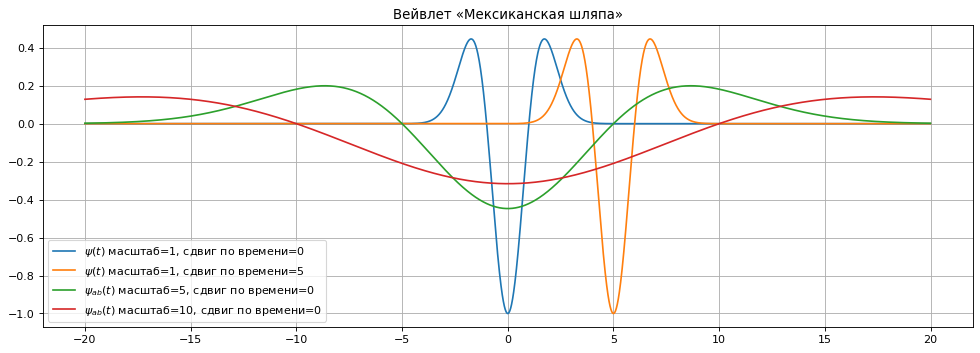

In [288]:
# Вейвлет "Мексиканская шляпа"
def HAT(s,T,t):
    # s - масштаб, T - сдвиг по времени, t - время по которому интегрируем
    f = (1/s**0.5)*np.exp(-0.5*((t-T)/s)**2)* (((t-T)/s)**2-1)  # формула шляпы
    return f

x = arange(-20,20,0.01)

figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.title("Вейвлет «Мексиканская шляпа»")
y=[HAT(1,0,t) for t in x]
plt.plot(x,y,label="$\psi(t)$ масштаб=1, сдвиг по времени=0") 
y=[HAT(1,5,t) for t in x]
plt.plot(x,y,label="$\psi(t)$ масштаб=1, сдвиг по времени=5") 
y=[HAT(5,0,t) for t in x]
plt.plot(x,y,label="$\psi_{ab}(t)$ масштаб=5, сдвиг по времени=0")   
y=[HAT(10,0,t) for t in x]
plt.plot(x,y,label="$\psi_{ab}(t)$ масштаб=10, сдвиг по времени=0")   
plt.legend(loc='best')
plt.grid(True)
plt.show()

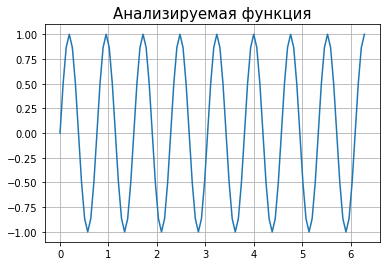

In [289]:
# Функия для анализа 
def function(x):
    return np.sin(5*pi*x/30)
# Функция вычисление Wavelet-преобразования сигнала пна базе Мексиканской шляпы
def waveletHat(s,T): 
    # s - масштаб, T - сдвиг по времени
    f = lambda t :(1/s**0.5)*np.exp(-0.5*((t-T)/s)**2)* (((t-T)/s)**2-1)*function(t)
    r = quad(f, -256, 256)
    return r[0]

x = np.linspace(0, np.pi * 2, 100)
y = [function(x) for x in arange(0,100,1)]

plt.figure()
plt.title('Анализируемая функция', size=15)
plt.plot(x,y)
plt.grid()

Text(0.5, 0, 'Амплитуда преобразования: Ampl')

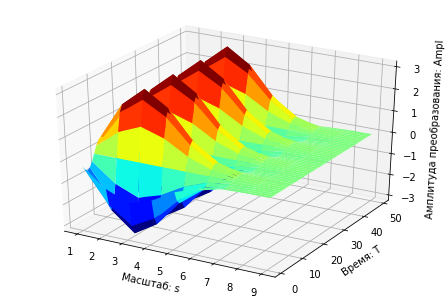

In [290]:
# Вывод wavelet - преобразования
Scale = arange(1,10,1)
Time = arange(1,50,1)
Ampl = array([waveletHat(s,T) for T in Time for s in Scale])

X, Y = meshgrid(Scale, Time) # получаем матрицу координат (нижняя плоскость)
Z = Ampl.reshape(49,-1)
fig = plt.figure("Вейвлет- спектр")
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('Масштаб: s')
ax.set_ylabel('Время: T')
ax.set_zlabel('Амплитуда преобразования: Ampl')


#### Исследование более сложной функции (Нестационарный сигнал)

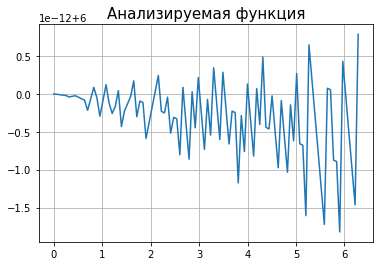

In [291]:
# Функия для анализа 
def function(x):
    return 0. + 2.*np.sin(2*pi*x * 3) + 7 - np.cos(2*pi*x * 2 ) + np.tan(2*pi*x * 16)
# Функция вычисление Wavelet-преобразования сигнала пна базе Мексиканской шляпы
def waveletHat(s,T): 
    # s - масштаб, T - сдвиг по времени
    f = lambda t :(1/s**0.5)*np.exp(-0.5*((t-T)/s)**2)* (((t-T)/s)**2-1)*function(t)
    r = quad(f, -256, 256)
    return r[0]

x = np.linspace(0, np.pi * 2, 100)
y = [function(x) for x in arange(0,100,1)]

plt.figure()
plt.title('Анализируемая функция', size=15)
plt.plot(x,y)
plt.grid()

G:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  
G:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  


Text(0.5, 0, 'Амплитуда преобразования: Ampl')

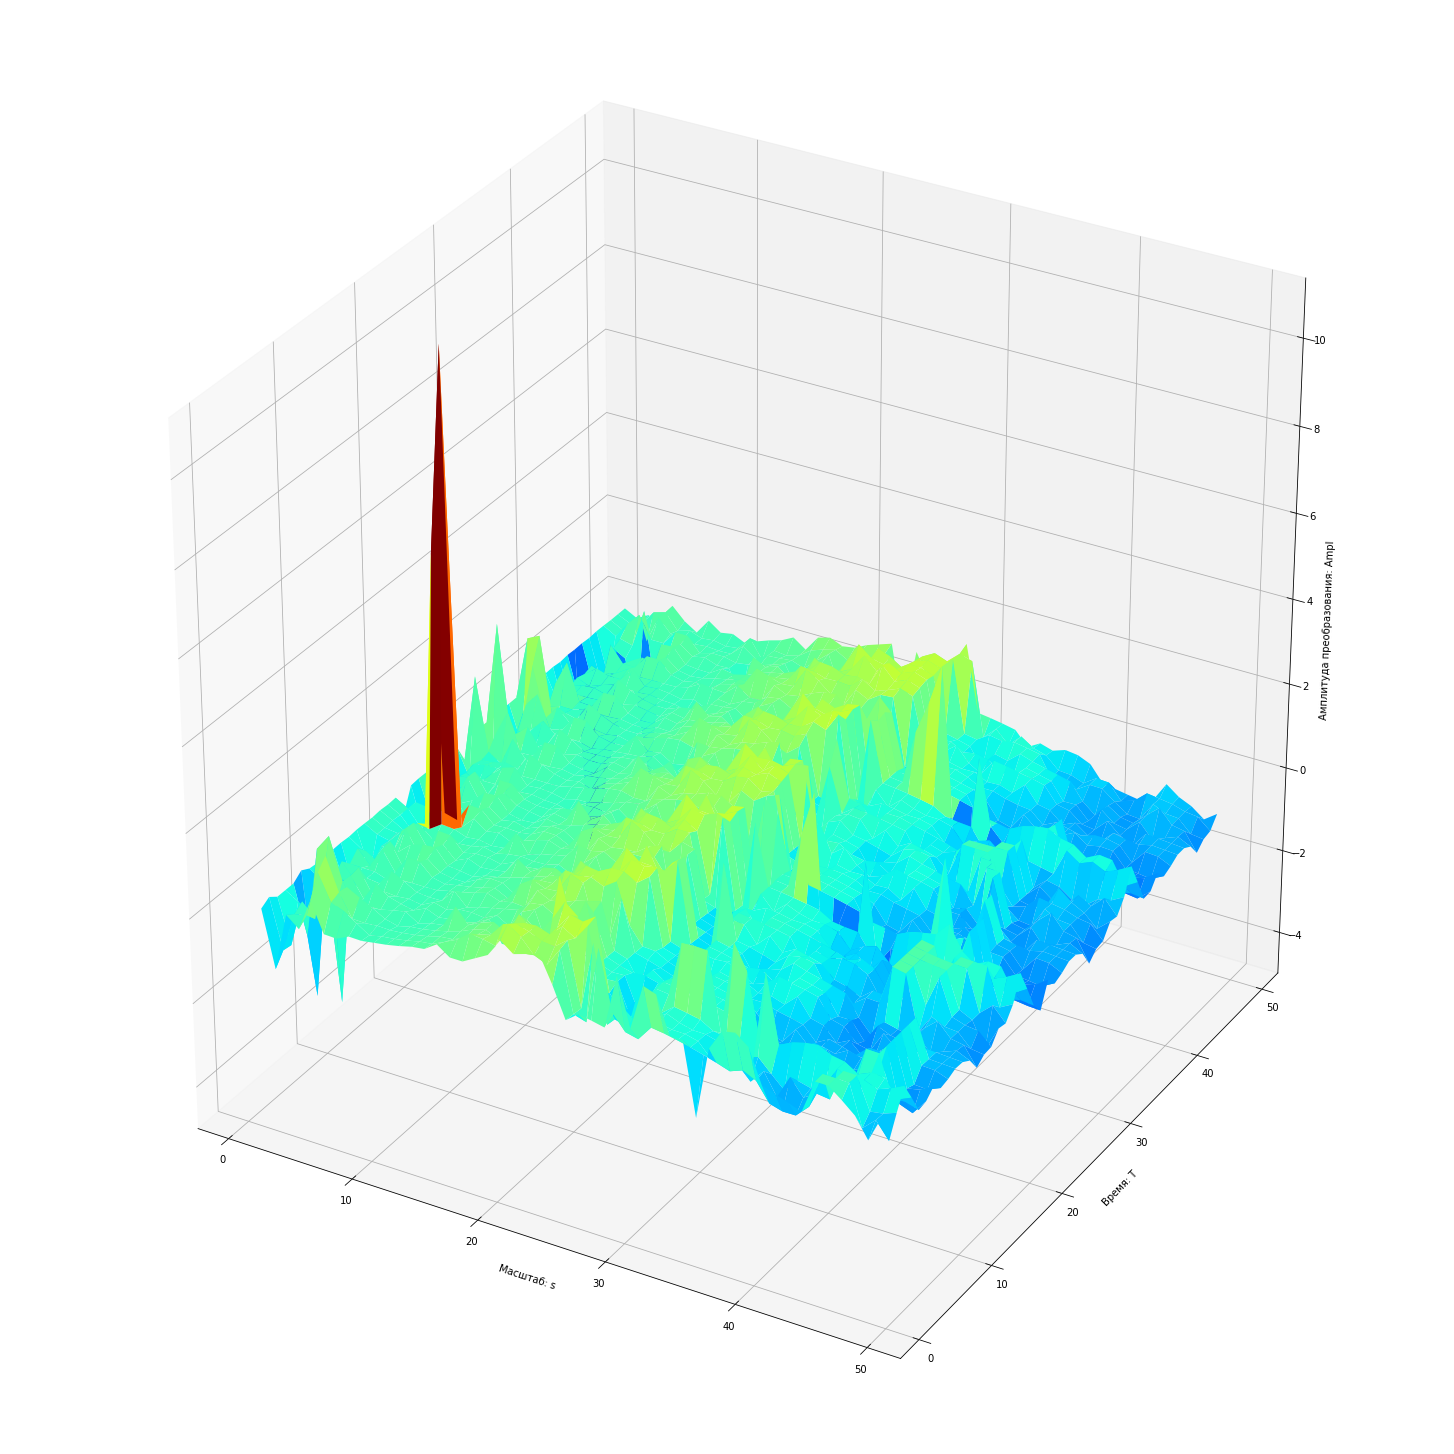

In [292]:
# Вывод wavelet - преобразования
Scale = arange(1,50,1)
Time = arange(1,50,1)
Ampl = array([waveletHat(s,T) for T in Time for s in Scale])

X, Y = meshgrid(Scale, Time) # получаем матрицу координат (нижняя плоскость)
Z = Ampl.reshape(49,-1)
fig = plt.figure(figsize=(20, 20))
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('Масштаб: s')
ax.set_ylabel('Время: T')
ax.set_zlabel('Амплитуда преобразования: Ampl')

**Область высокого масштаба (низкие частоты) - большая детализация по времени  
Область низкого масштаба (высокие частоты) - меньшая детализация по времени**

## "Морле"

In [1]:
# Комплексный вейвлет "Морле"
def MORLE(s,T,t):
    # s - масштаб, T - сдвиг по времени, t - время по которому интегрируем
    f = np.exp(-0.5*((t-T)/s)**2) * np.exp(1j * 30 * (t-T)/s)  # формула Морле
    return f

x = arange(-20,20,0.01)

figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.title("Вейвлет «Морле»")
y=[MORLE(1,0,t) for t in x]
plt.plot(x,y,label="$\psi(t)$ масштаб=1, сдвиг по времени=0") 
y=[MORLE(5,0,t) for t in x]
plt.plot(x,y,label="$\psi(t)$ масштаб=1, сдвиг по времени=0") 
plt.grid(True)
plt.show()

NameError: name 'arange' is not defined

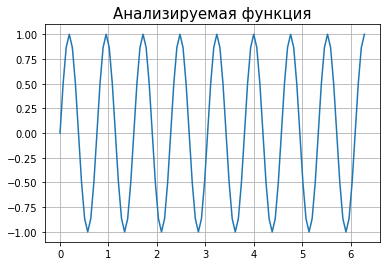

In [294]:
# Функия для анализа 
def function(x):
    return np.sin(5*pi*x/30)
# Функция вычисление Wavelet-преобразования сигнала пна базе Морле
def waveletMORLE(s,T): 
    # s - масштаб, T - сдвиг по времени
    f = lambda t : np.exp(-0.5*((t-T)/s)**2) * np.exp(1j * 40 * (t-T)/s)*function(t)
    r = quad(f, -256, 256)
    return r[0]

x = np.linspace(0, np.pi * 2, 100)
y = [function(x) for x in arange(0,100,1)]

plt.figure()
plt.title('Анализируемая функция', size=15)
plt.plot(x,y)
plt.grid()

G:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  
G:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  


Text(0.5, 0, 'Амплитуда преобразования: Ampl')

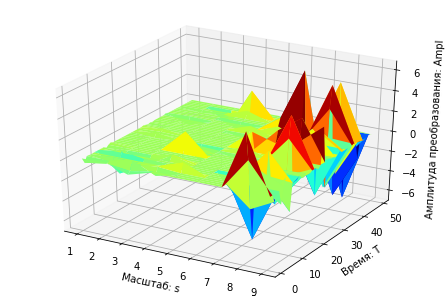

In [295]:
# Вывод wavelet - преобразования
Scale = arange(1,10,1)
Time = arange(1,50,1)
Ampl = array([waveletMORLE(s,T) for T in Time for s in Scale])

X, Y = meshgrid(Scale, Time) # получаем матрицу координат (нижняя плоскость)
Z = Ampl.reshape(49,-1)
fig = plt.figure("Вейвлет- спектр")
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('Масштаб: s')
ax.set_ylabel('Время: T')
ax.set_zlabel('Амплитуда преобразования: Ampl')

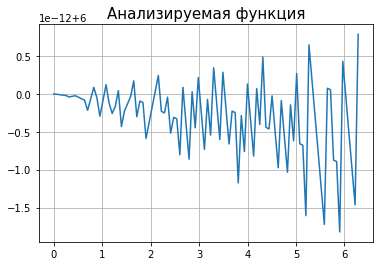

In [296]:
# Функия для анализа 
def function(x):
    return 0. + 2.*np.sin(2*pi*x * 3) + 7 - np.cos(2*pi*x * 2 ) + np.tan(2*pi*x * 16)

x = np.linspace(0, np.pi * 2, 100)
y = [function(x) for x in arange(0,100,1)]

plt.figure()
plt.title('Анализируемая функция', size=15)
plt.plot(x,y)
plt.grid()

G:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  
G:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  


Text(0.5, 0, 'Амплитуда преобразования: Ampl')

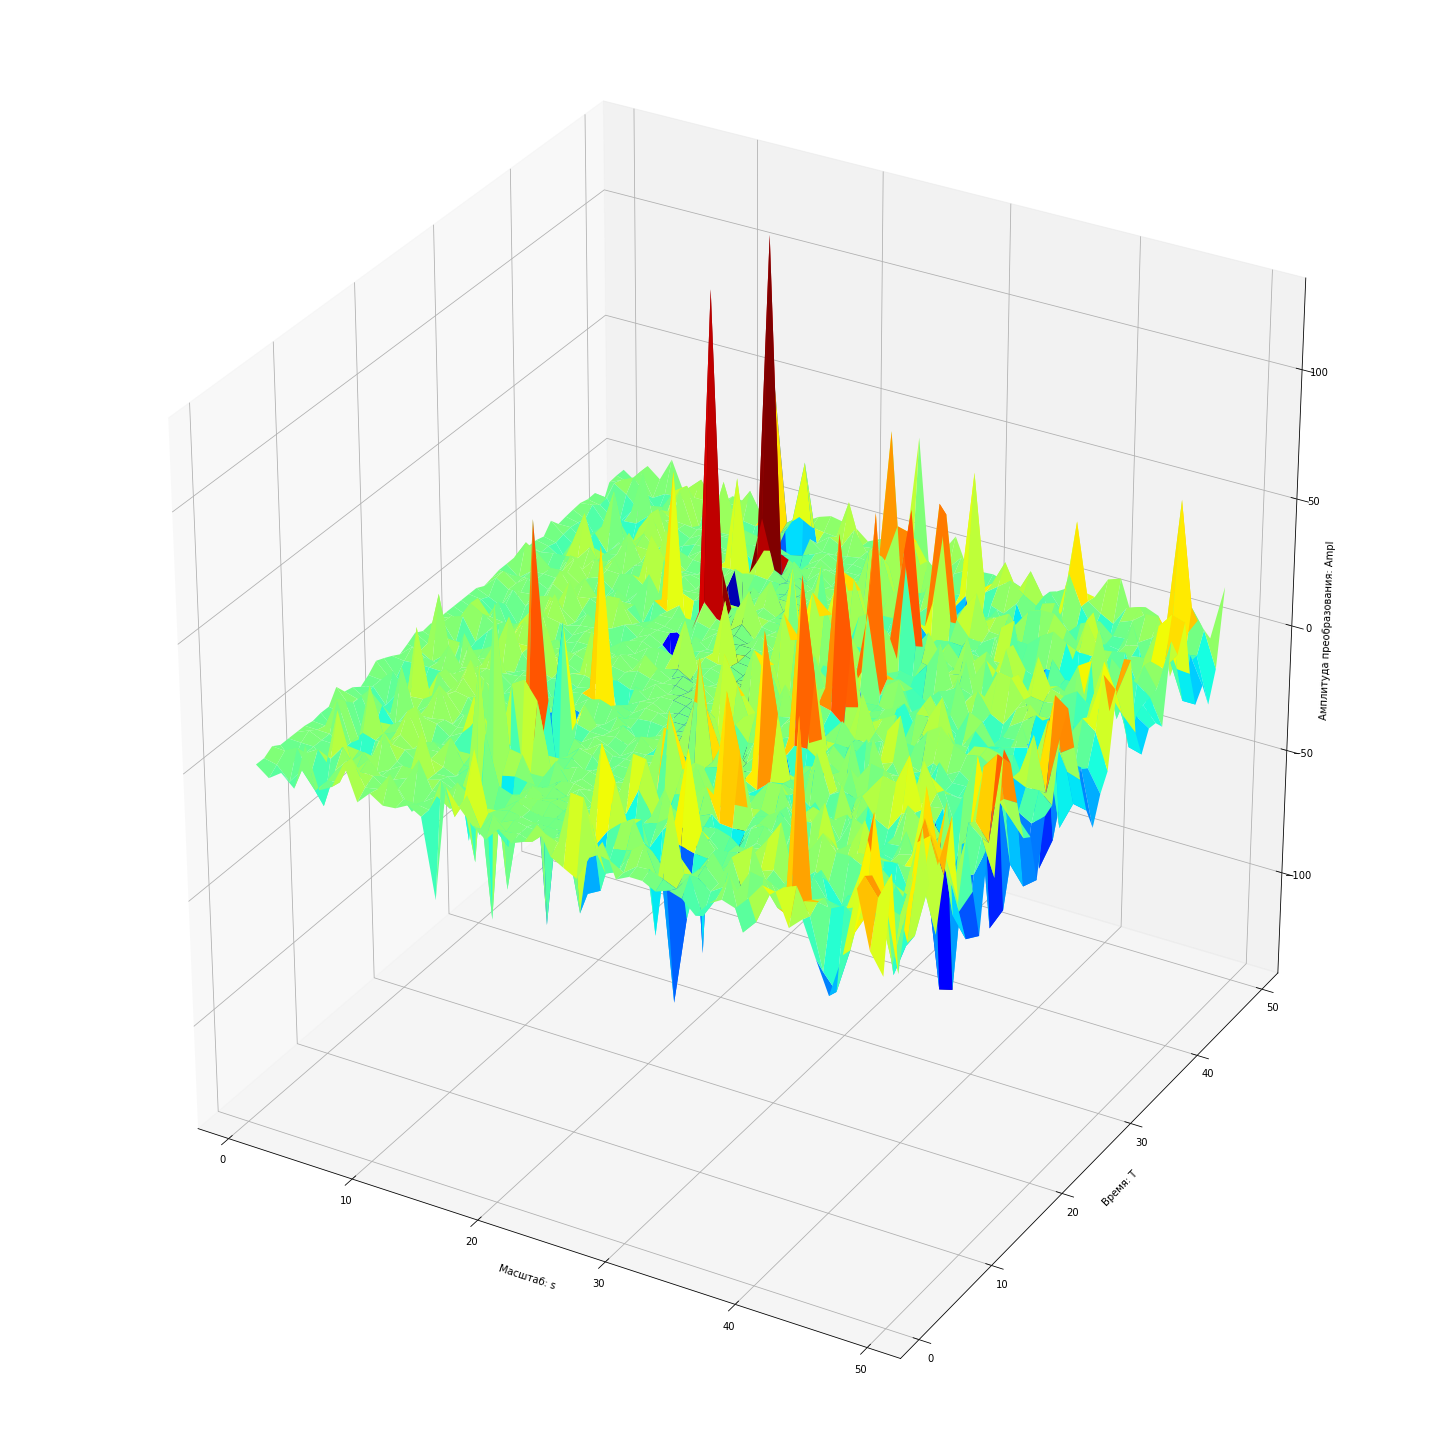

In [297]:
# Вывод wavelet - преобразования
Scale = arange(1,50,1)
Time = arange(1,50,1)
Ampl = array([waveletMORLE(s,T) for T in Time for s in Scale])

X, Y = meshgrid(Scale, Time) # получаем матрицу координат (нижняя плоскость)
Z = Ampl.reshape(49,-1)
fig = plt.figure(figsize=(20, 20))
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('Масштаб: s')
ax.set_ylabel('Время: T')
ax.set_zlabel('Амплитуда преобразования: Ampl')

### Свой материнский wavelet

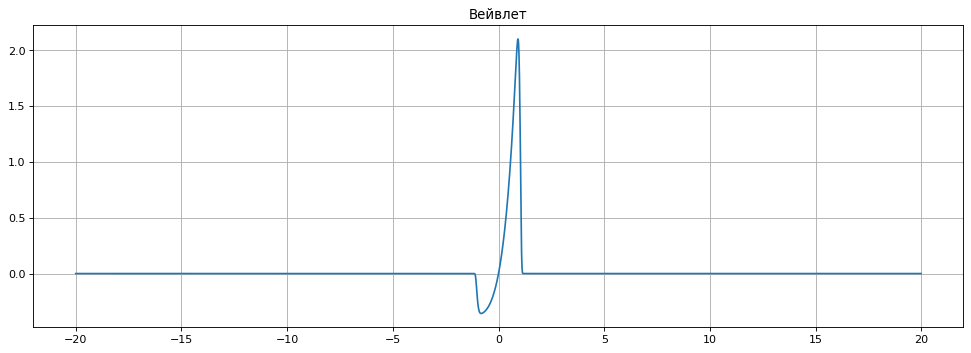

In [298]:
# Вейвлет
def MY(s,T,t):
    # s - масштаб, T - сдвиг по времени, t - время по которому интегрируем
    f = (1/s**0.5) * np.exp(-0.5*((t-T)/s)**20) * ((t-T)/s) * np.exp((t-T)/s)   # формула wavelet
#     if (t<=0):
    return f
#     else:
#         return -f

x = arange(-20,20,0.01)

figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.title("Вейвлет")
y=[MY(1,0,t) for t in x]
plt.plot(x,y,label="$\psi(t)$ масштаб=1, сдвиг по времени=0") 
plt.grid(True)
plt.show()

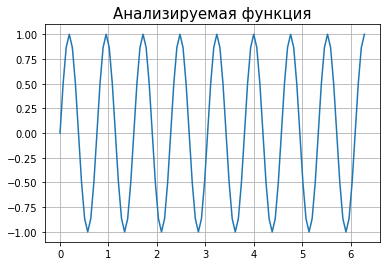

In [303]:
# Функия для анализа 
def function(x):
    return np.sin(5*pi*x/30)
# Функция вычисление Wavelet-преобразования сигнала пна базе Морле
def waveletMY(s,T): 
    # s - масштаб, T - сдвиг по времени
#     f = lambda t : ((1/s**0.5) * np.exp(-0.5*((t-T)/s)**20) * ((t-T)/s) * np.sin((t-T)/s))*function(t) if t <= 0 else -((1/s**0.5) * np.exp(-0.5*((t-T)/s)**20) * ((t-T)/s) * np.sin((t-T)/s))*function(t)
    f = lambda t : MY(s, T, t)*function(t)
#     f = lambda t : np.exp(-0.5*((t-T)/s)**2) * np.exp(1j * 40 * (t-T)/s)*function(t)
    r = quad(f, -256, 256)
    return r[0]

x = np.linspace(0, np.pi * 2, 100)
y = [function(x) for x in arange(0,100,1)]

plt.figure()
plt.title('Анализируемая функция', size=15)
plt.plot(x,y)
plt.grid()

Text(0.5, 0, 'Амплитуда преобразования: Ampl')

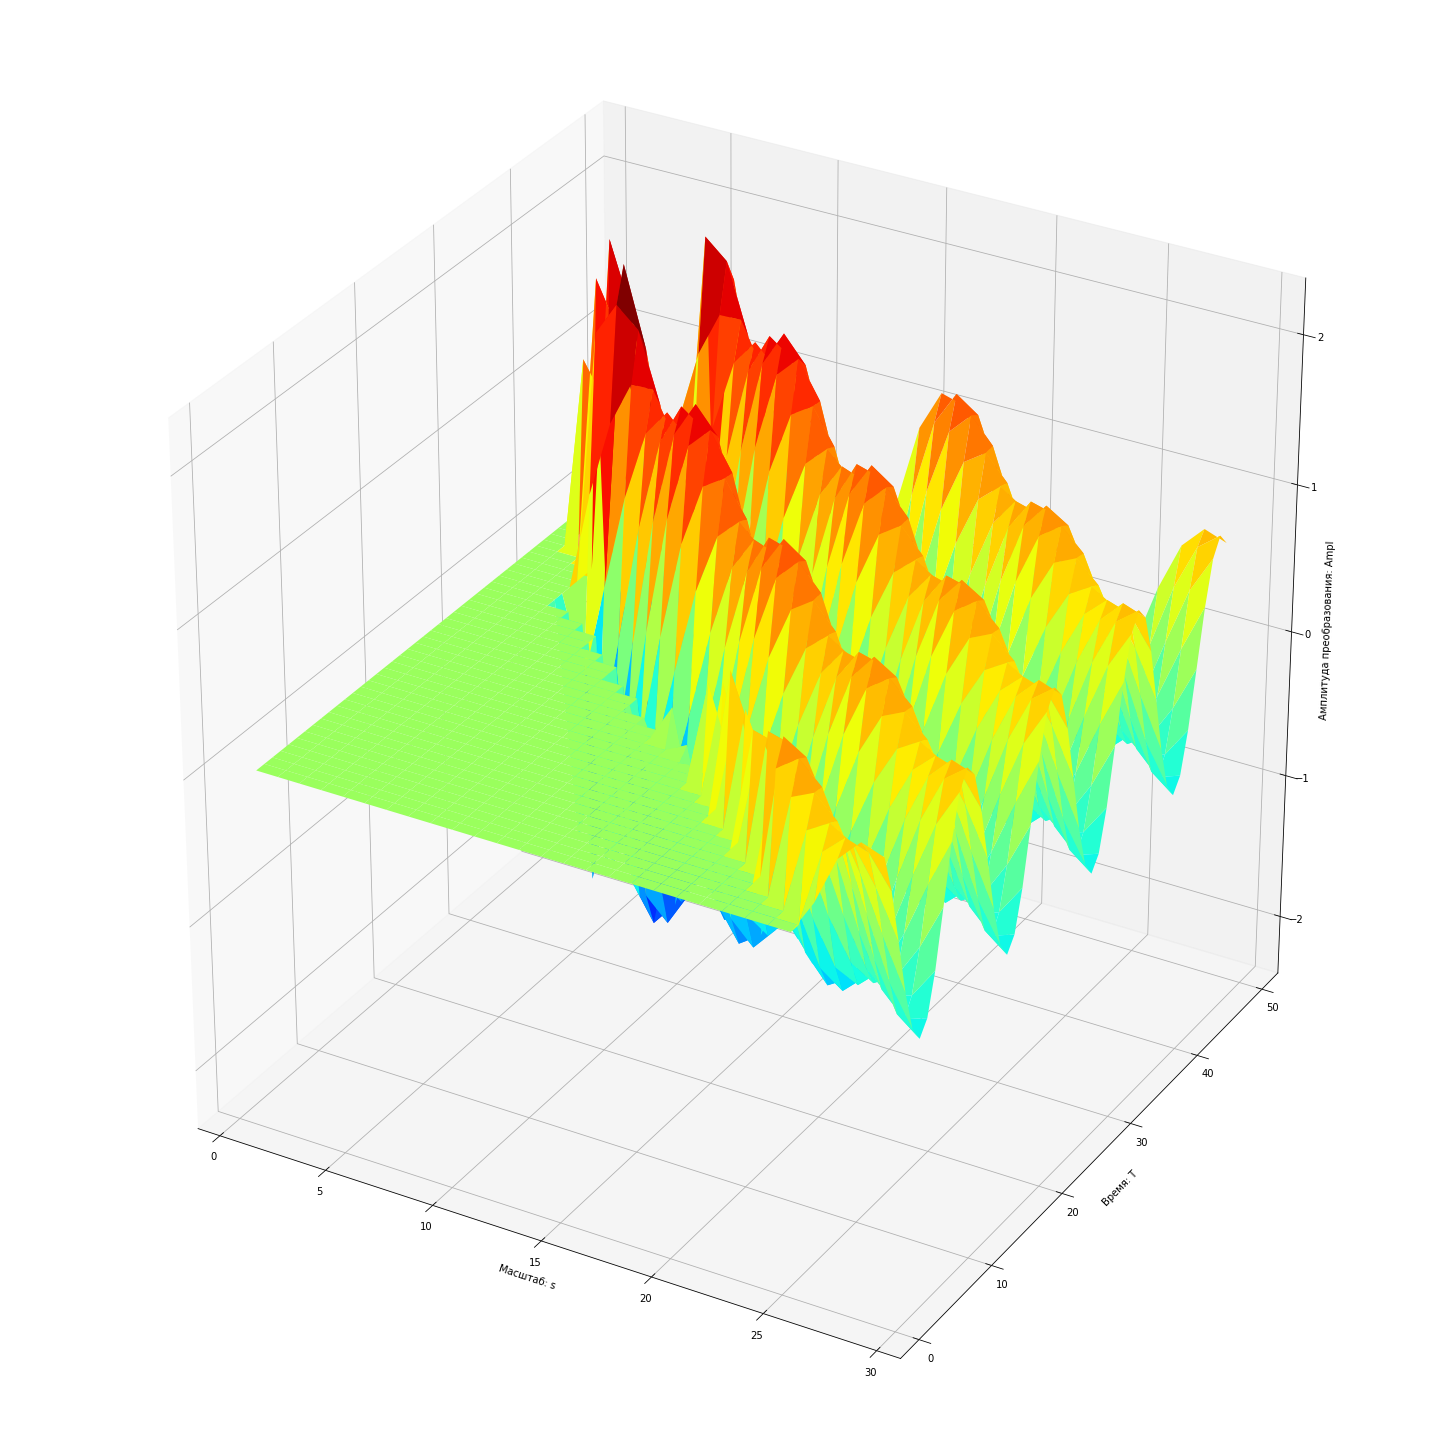

In [311]:
# Вывод wavelet - преобразования
Scale = arange(1,30,1)
Time = arange(1,50,1)
Ampl = array([waveletMY(s,T) for T in Time for s in Scale])

X, Y = meshgrid(Scale, Time) # получаем матрицу координат (нижняя плоскость)
Z = Ampl.reshape(49,-1)
fig = plt.figure(figsize=(20, 20))
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('Масштаб: s')
ax.set_ylabel('Время: T')
ax.set_zlabel('Амплитуда преобразования: Ampl')

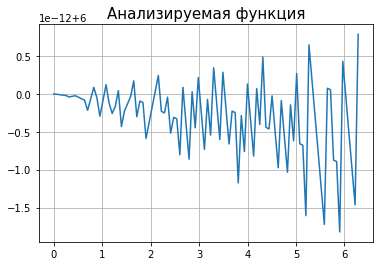

In [312]:
# Функия для анализа 
def function(x):
    return 0. + 2.*np.sin(2*pi*x * 3) + 7 - np.cos(2*pi*x * 2 ) + np.tan(2*pi*x * 16)

x = np.linspace(0, np.pi * 2, 100)
y = [function(x) for x in arange(0,100,1)]

plt.figure()
plt.title('Анализируемая функция', size=15)
plt.plot(x,y)
plt.grid()

G:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  # Remove the CWD from sys.path while we load stuff.
G:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 0, 'Амплитуда преобразования: Ampl')

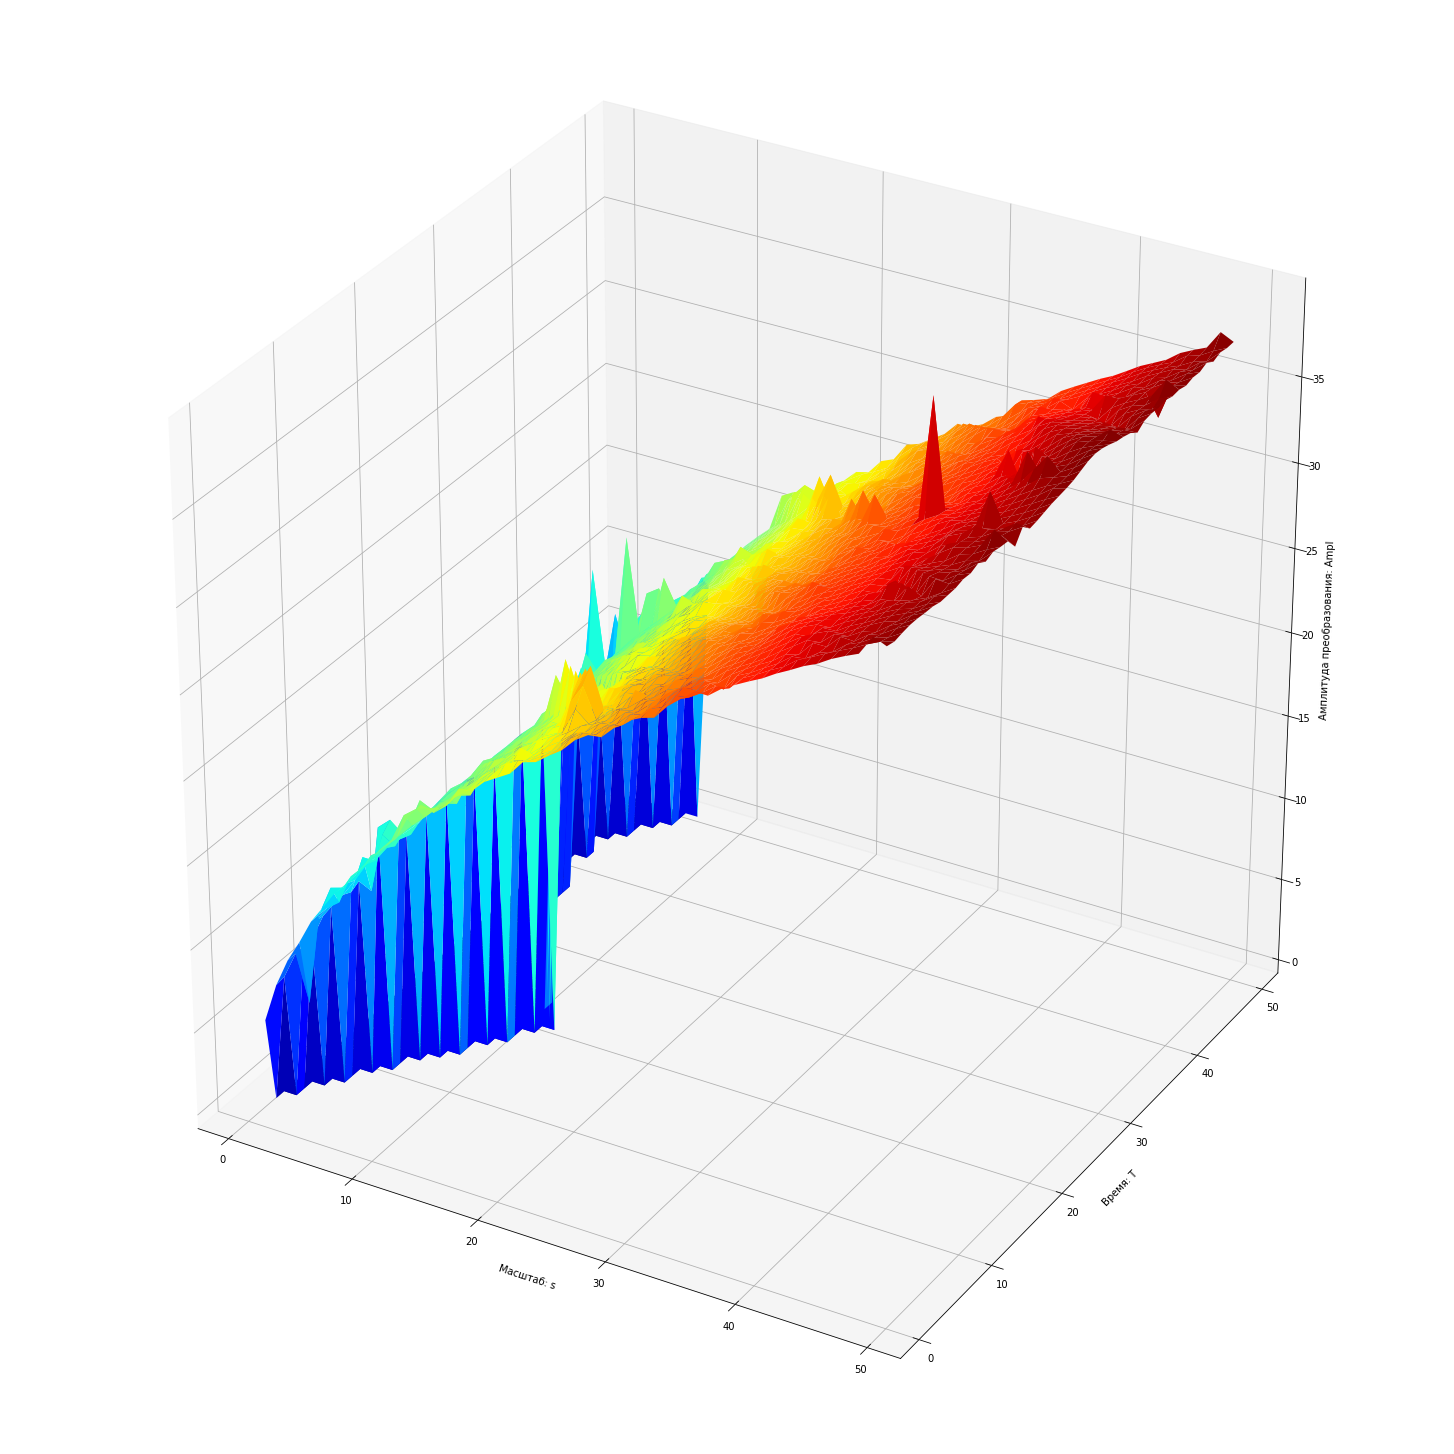

In [313]:
# Вывод wavelet - преобразования
Scale = arange(1,50,1)
Time = arange(1,50,1)
Ampl = array([waveletMY(s,T) for T in Time for s in Scale])

X, Y = meshgrid(Scale, Time) # получаем матрицу координат (нижняя плоскость)
Z = Ampl.reshape(49,-1)
fig = plt.figure(figsize=(20, 20))
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('Масштаб: s')
ax.set_ylabel('Время: T')
ax.set_zlabel('Амплитуда преобразования: Ampl')

### Выводы:  
В ходе работы были рассмотрены Преобразование Фурье, его недостатка; далее Оконное Преобразование Фурье с его недостатками; далее проанализировано Wavelet преобразование.  
Были рассмотрены материнские wavelet-ы: "Мексиканская шляпа", "Морле", а также попытка построить свой материнский wavelet.  
Для каждого преобразования построены преобразования на простых стационарных сигналах, а также на нестационарных.